In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label


ds_train: tf.data.Dataset = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test: tf.data.Dataset = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


c:\python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
    verbose=False
)


KeyboardInterrupt: 

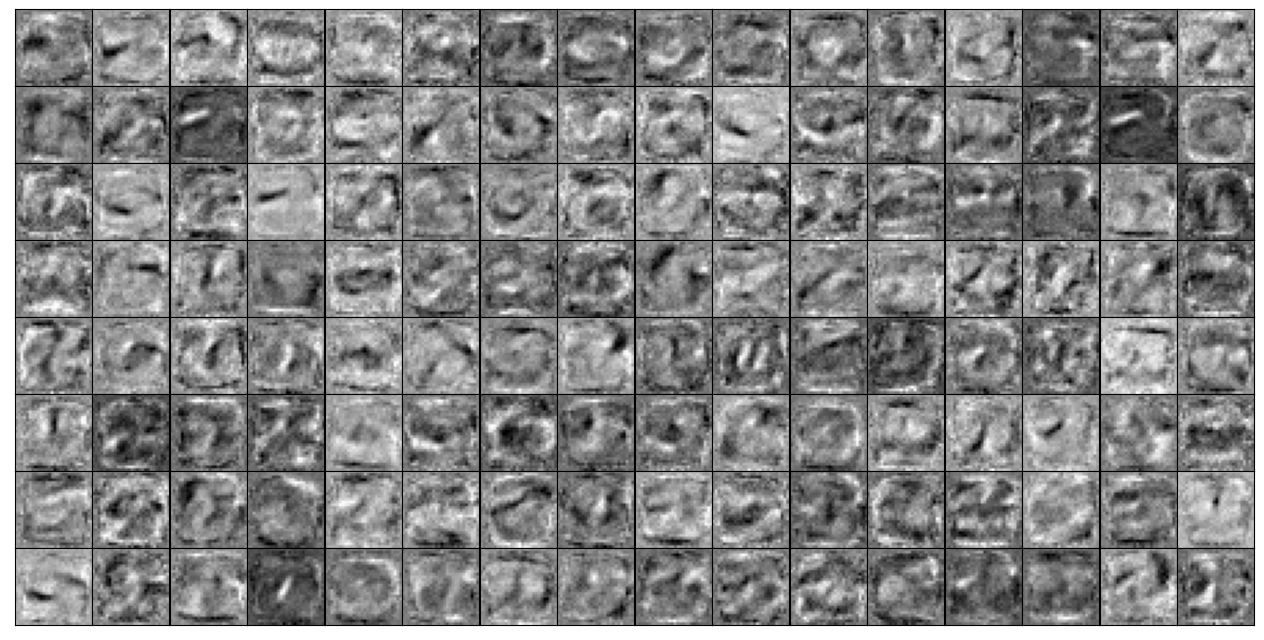

In [20]:
def sig(x):
    return 1 / (1+np.exp(-x))
weights_in: tf.Tensor = model.weights[0].value()
weights_in = np.array(weights_in).T
biases_in: tf.Tensor = model.weights[1].value()
biases_in = np.array(biases_in).T

def show(sets, cols=16,rows=8, negate=False):
    fig = plt.figure(figsize=(cols,rows))
    gs = fig.add_gridspec(rows,cols, hspace=0, wspace=0)
    a = gs.subplots()
    a: list[plt.Axes] = a.flatten()
    toplot = 1 - sig(sets) if negate else sets
    for i in range(len(sets)):
        a[i].imshow(toplot[i], cmap='gray')
        a[i].set_xticks([])
        a[i].set_yticks([])
    plt.show()


results_in = weights_in # + biases_in.reshape(1, -1).T
# show(sig(weights_in.reshape(len(results_in), 28, 28)))
# show(weights_in)
show(results_in.reshape(len(results_in), 28, 28))


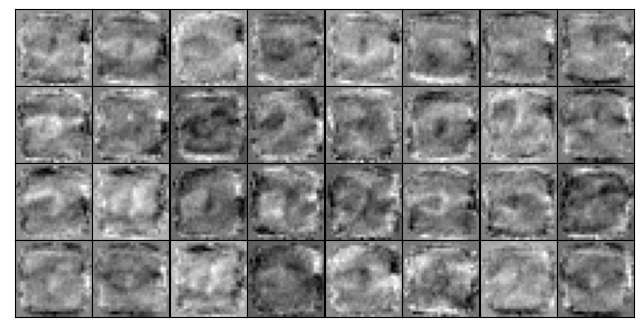

In [23]:
weights_1: tf.Tensor = model.weights[2].value()
weights_1 = np.array(weights_1).T
biases_1: tf.Tensor = model.weights[3].value()
biases_1 = np.array(biases_1).T
multis = []
biased_ = results_in # + biases_in.reshape(1, -1).T
for i in range(32):
    wmul = np.dot(weights_1[i], biased_)
    multis.append(wmul)
results_1 = np.array(multis)
del (biased_)
# wshort1 = wsum1.sum()
show(results_1.reshape(len(results_1), 28, 28), rows=4, cols=8)


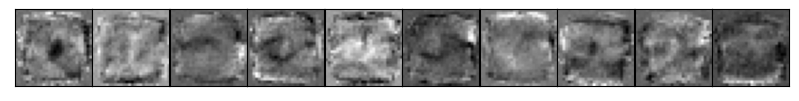

In [29]:
weights_2: tf.Tensor = model.weights[4].value()
weights_2 = np.array(weights_2).T
biases_2: tf.Tensor = model.weights[5].value()
biases_2 = np.array(biases_2).T
multis = []
biased_ = results_1 # + biases_1.reshape(1, -1).T
for i in range(10):
    wmul = np.dot(weights_2[i], biased_)
    multis.append(wmul)
results_2 = np.array(multis)
del (biased_)
show(results_2.reshape(len(results_2), 28, 28), rows=1, cols=10)
